# Exercise Lesson 1

In [89]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint

from sklearn.decomposition import PCA

In [90]:
style.use("ggplot")

In [91]:
# loading the data
df = pd.read_csv('SP500Data.csv', parse_dates=True, index_col=0)

# Visualizing the dataframe
print(df.head())

                    A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2019-01-02  65.690002  32.480000  157.919998  39.480000  89.230003  74.449997   
2019-01-03  63.270000  30.059999  162.850006  35.547501  86.290001  73.370003   
2019-01-04  65.459999  32.040001  158.809998  37.064999  89.070000  74.220001   
2019-01-07  66.849998  32.950001  161.139999  36.982498  90.370003  74.750000   
2019-01-08  67.830002  32.419998  160.020004  37.687500  90.790001  75.550003   

                  ABT       ACGL         ACN        ADBE  ...        WYNN  \
Date                                                      ...               
2019-01-02  69.500000  26.190001  140.589996  224.570007  ...  104.400002   
2019-01-03  66.220001  25.780001  135.789993  215.699997  ...  103.389999   
2019-01-04  68.110001  26.389999  141.070007  226.190002  ...  107.559998   
2019-01-07  69.129997  26.330000  141.559998  2

In [92]:
# Dropping 'Not a Number' columns for ZION
df.drop(['ZION'], axis=1, inplace=True)
# Copying the dataframe to add features
data = pd.DataFrame(df.copy())

In [93]:
#Getting rid of the columns with more than 30% missing values.

missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions.head()

drop_list = list(missing_fractions[missing_fractions > 0.3].index)
df.drop(labels=drop_list, axis=1, inplace=True)

print('NA Values =',df.isna().values.any())
# no NA values, so no need to fill in

NA Values = True


In [94]:
# Copying the dataframe to add features
data = pd.DataFrame(df.copy())
data.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,32.480000,157.919998,39.480000,89.230003,74.449997,69.500000,26.190001,140.589996,224.570007,...,21.530001,104.400002,48.220001,69.690002,37.889999,66.510002,91.440002,99.300972,156.240005,84.480003
2019-01-03,63.270000,30.059999,162.850006,35.547501,86.290001,73.370003,66.220001,25.780001,135.789993,215.699997,...,22.260000,103.389999,48.029999,68.620003,37.910000,64.230003,89.139999,97.504852,146.880005,81.559998
2019-01-04,65.459999,32.040001,158.809998,37.064999,89.070000,74.220001,68.110001,26.389999,141.070007,226.190002,...,23.020000,107.559998,48.500000,71.150002,39.009998,66.940002,91.459999,100.834953,152.970001,84.760002
2019-01-07,66.849998,32.950001,161.139999,36.982498,90.370003,74.750000,69.129997,26.330000,141.559998,229.259995,...,23.480000,109.470001,48.290001,71.519997,39.709999,65.949997,91.360001,100.873787,155.289993,85.269997
2019-01-08,67.830002,32.419998,160.020004,37.687500,90.790001,75.550003,68.300003,26.430000,145.139999,232.679993,...,23.620001,112.900002,48.849998,72.040001,39.439999,66.570000,91.180000,98.611649,156.330002,86.540001


In [95]:
# Daily Returns
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = data.pct_change(1)

In [96]:
# Data Raw
data_raw = datareturns
data_raw.dropna(how='all', inplace=True)

In [97]:
# Normalizing the Log returns
data = (data_raw - data_raw.mean()) / data_raw.std()

# Getting rid of the NaN values.
data.dropna(how='any', inplace=True)
data_raw.dropna(how='any', inplace=True)

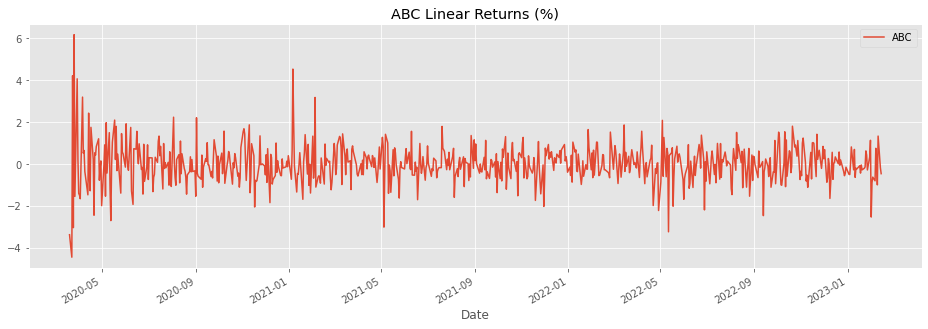

In [98]:
# Visualizing Log Returns for the ABC 
plt.figure(figsize=(16, 5))
plt.title("ABC Linear Returns (%)")
data.ABC.plot()
plt.grid(True);
plt.legend()
plt.show()

In [99]:
# Taking away the market benchmark ABC
stock_tickers = data.columns.values[:-1]
n_tickers = len(stock_tickers)

In [100]:
# Dividing the dataset into training and testing sets
percentage = int(len(data) * 0.8)
X_train = data[:percentage]
X_test = data[percentage:]

X_train_raw = data_raw[:percentage]
X_test_raw = data_raw[percentage:]

In [101]:
# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
cov_matrix = X_train.loc[:,X_train.columns != 'ABC'].cov()
pca = PCA()
pca.fit(cov_matrix)

PCA()

9 principal components explain 95.00% of variance


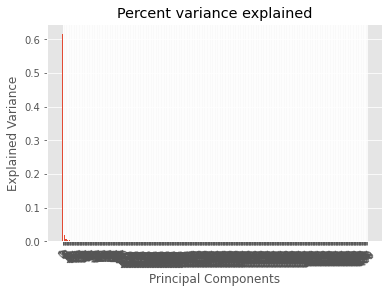

In [102]:
def plotPCA(plot=False):

    # Visualizing Variance against number of principal components.
    cov_matrix_raw = X_train_raw.loc[:,X_train_raw.columns != 'ABC'].cov()

    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = stock_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

plotPCA(plot=True)

In [103]:
projected = pca.fit_transform(cov_matrix)
pcs = pca.components_

In [104]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

<ipython-input-104-412c017d7daa>:10: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
<ipython-input-104-412c017d7daa>:10: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


Eigen portfolio #324 with the highest Sharpe. Return nan%, vol = 833.64%, Sharpe = nan
       Return       Vol    Sharpe
46   1.535419  0.389935  3.937626
449  0.209279  0.063201  3.311342
301  0.337794  0.103728  3.256519
283  0.184161  0.057266  3.215865
234  0.890944  0.278324  3.201104
106  0.174591  0.055483  3.146728
96   0.530358  0.170074  3.118396
268  0.289702  0.094473  3.066508
198  0.258013  0.085778  3.007926
197  1.127025  0.375887  2.998310


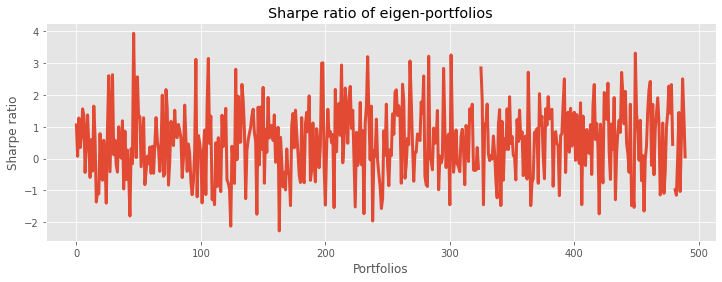

In [105]:
def optimizedPortfolio():
    n_portfolios = len(pcs)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 

    for i in range(n_portfolios):
        
        pc_w = pcs[:, i] / sum(pcs[:, i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen_prtfi / n_portfolios)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(10))

    plt.show()

optimizedPortfolio()

<ipython-input-106-222dba8ffc9b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weights["weights_{}".format(i)] = pcs[:, i] / sum(pcs[:, i])
<ipython-input-106-222dba8ffc9b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weights["weights_{}".format(i)] = pcs[:, i] / sum(pcs[:, i])
<ipython-input-106-222dba8ffc9b>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

Sum of weights of current eigen-portfolio: 100.00


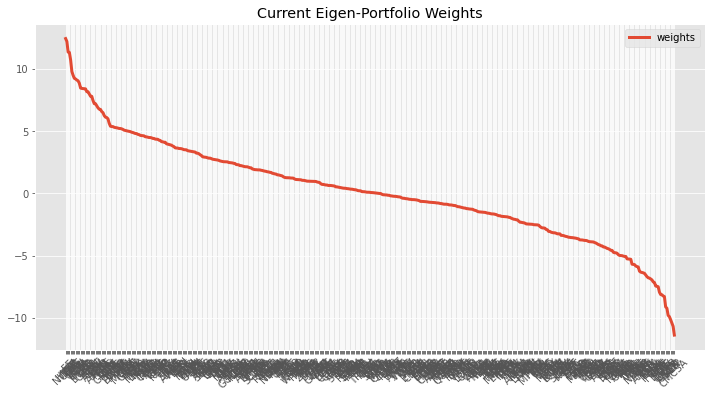

,weights
NWSA,12.449397
HWM,12.216486
FE,11.361860
EXC,11.339229
CTAS,10.737082
...,...
CSCO,-9.908612
CZR,-10.153876
BEN,-10.426031
KDP,-10.688311


In [106]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pcs)):
        weights["weights_{}".format(i)] = pcs[:, i] / sum(pcs[:, i])

    weights = weights.values.T
    return weights

weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()

    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[4], plot=True)

Current Eigen-Portfolio:
Return = 3.86%
Volatility = 5.73%
Sharpe = 0.67


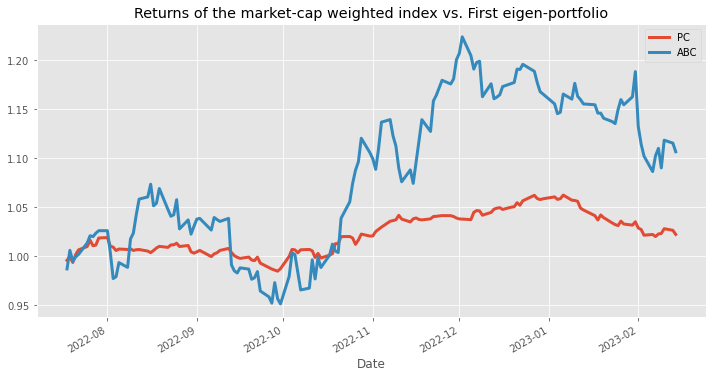

In [108]:
def plotSharpe(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''

    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen.index], eigen / len(pcs))
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=X_test.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC': eigen_portfolio_returns, 'ABC': X_test_raw.loc[:, 'ABC']}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)
    plt.show()

plotSharpe(eigen=plotEigen(weights=weights[4]))

A return of 3.86% and a volatility of 5.73% suggest that the eigen-portfolio has a relatively low-risk profile compared to the overall market. 

The Sharpe ratio of 0.67 indicates that the portfolio has generated a relatively good return for the amount of risk taken.